# Bag of Words  - Corpus
- load sentences from TED talks. We will refer to every sentence as a distinct document. 
- pre-process sentences: remove tailing newlines, capitalization and punctuation

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

## Load the data and split into paragraphs

In [14]:
path= r"C:\Users\Leon\Desktop\machine learning\lesson_1\week_1\Bag Of Words\local_data\ted talks\clean_TED_lalks.pkl.zip"
ted_talks = pd.read_pickle(path)

In [15]:
ted_talks.head(5)

,id,speaker,headline,url,description,transcript_url,month_filmed,year_filmed,event,duration,...,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general,transcript_lines,corpus
0,1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,00:16:17,...,0.00,0.48,0.00,0.22,0.0,0.00,0.00,0.22,"[Thank you so much, Chris.\nAnd it's truly a g...",thank you so much chris and its truly a great ...
1,2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,00:15:06,...,0.00,0.30,0.00,0.11,0.0,0.11,0.04,0.15,"[In terms of invention,\nI'd like to tell you ...",in terms of invention id like to tell you the ...
2,3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,00:18:45,...,0.04,0.32,0.12,0.20,0.0,0.04,0.04,0.08,"[A public, Dewey long ago observed,\nis consti...",a public dewey long ago observed is constitute...
3,4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,00:19:37,...,0.00,0.19,0.00,0.10,0.0,0.00,0.00,0.16,"[I want to start off by saying, Houston, we ha...",i want to start off by saying houston we have ...
4,5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,00:20:04,...,0.00,0.39,0.00,0.05,0.0,0.00,0.03,0.13,"[What I want to talk about is, as background,\...",what i want to talk about is as background is ...


In [16]:
ted_talks.shape

(2475, 125)

In [19]:
ted_talks['corpus']

0       thank you so much chris and its truly a great ...
1       in terms of invention id like to tell you the ...
2       a public dewey long ago observed is constitute...
3       i want to start off by saying houston we have ...
4       what i want to talk about is as background is ...
                              ...                        
2470    imagine that when you walked in here this even...
2471    paying close attention to something not that e...
2472    so this happy pic of me was taken in 1999 i wa...
2473    my sevenyearold grandson sleeps just down the ...
2474    michael browning engineer innovator  inventor ...
Name: corpus, Length: 2475, dtype: object

## Bag of Words: line with word counts for every sentence. 

### Create document vectors
<code>sklearn.feature_extraction.text.CountVectorizer</code> executes tasks:

- constructs dictionary
- creates a sperse term-document count matrix

Note that <code>sklearn.feature_extraction.text.CountVectorizer</code> receives texts and performs basic text preprocessing & tokenization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(ted_talks['corpus'])

In [23]:
matrix

<2475x68117 sparse matrix of type '<class 'numpy.int64'>'
	with 1460737 stored elements in Compressed Sparse Row format>

How sparse is the matrix? Compute matrix density

In [26]:
1460737 / (2475*68117), (matrix>0).sum()/ np.prod(matrix.shape)

(0.008664456269019006, 0.008664456269019006)

0.08 percent of all space is one, becouse of that we use sparse. 

In [27]:
matrix.todense() # convert matrix to dense representation

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print(f"matrix shape: {matrix.shape}, # documents: {len(ted_talks)}. # unique words: {len(vectorizer.get_feature_names_out())}")

matrix shape: (2475, 68117), # documents: 2475. # unique words: 68117


### display vocabulary

if it's not updated so it's will be without 'out'

In [33]:
vectorizer.get_feature_names_out()

array(['00', '0000000004', '0000001', ..., 'zywiec', 'zz143', 'zzzzzt'],
      dtype=object)

In [34]:
len(vectorizer.get_feature_names_out())

68117

### display doc vector composition

In [13]:
doc_id = 34
print(ted_talks['transcript'].iloc[doc_id])

0:11


Charles Van Doren, who was later
a senior editor of Britannica,
said the ideal encyclopedia
should be radical 
it should stop being safe.
But if you know anything about the history
of Britannica since 1962,
it was anything but radical:
still a very completely safe,
stodgy type of encyclopedia.
Wikipedia, on the other hand,
begins with a very radical idea,
and that's for all of us
to imagine a world
in which every single person on the planet
is given free access
to the sum of all human knowledge.




 0:39


And that's what we're doing.
So Wikipedia 
you just saw the little
demonstration of it 
it's a freely licensed encyclopedia.
It's written by thousands of volunteers
all over the world
in many, many languages.
It's written using wiki software 
which is the type of software
he just demonstrated 
so anyone can quickly edit and save,
and it goes live
on the Internet immediately.
And everything about Wikipedia is managed
by virtually an all-volunteer staff.
So when Yochai is talki

get vector representing document

מדפיס שורה של 68117 עמודות בה יש 897 ערכים ( כלומר מילים שונות )

In [39]:
doc_id=34
matrix[doc_id]

<1x68117 sparse matrix of type '<class 'numpy.int64'>'
	with 897 stored elements in Compressed Sparse Row format>

get indeces of existing words

איפה המילים מופיעות?

In [42]:
matrix[doc_id].indices

array([   55,    57,   333,   565,   771,   838,   860,   861,  1053,
        1413,  1416,  1590,  1734,  1737,  2021,  2060,  2272,  2280,
        2316,  2358,  2386,  2420,  2452,  2538,  2642,  2656,  2685,
        2689,  2758,  2838,  2839,  2847,  3068,  3116,  3224,  3233,
        3304,  3599,  3687,  3716,  3781,  3838,  3848,  3874,  4014,
        4077,  4129,  4161,  4226,  4378,  4385,  4391,  4648,  4649,
        4654,  4657,  4665,  4673,  4815,  4843,  5030,  5033,  5066,
        5087,  5091,  5166,  5167,  5251,  5252,  5302,  5332,  5379,
        5382,  5385,  5522,  5618,  6098,  6246,  6270,  6339,  6550,
        6574,  6823,  6993,  7086,  7103,  7154,  7182,  7204,  7206,
        7220,  7247,  7337,  7375,  7452,  7556,  7569,  7591,  7626,
        7627,  7684,  7698,  7699,  7756,  8069,  8335,  8418,  8490,
        8556,  8707,  8890,  9195,  9292,  9385,  9432,  9682,  9686,
        9690,  9712,  9893,  9899,  9943, 10010, 10228, 10290, 10344,
       10439, 10652,

get counts for existing wods

In [46]:
vectorizer.get_feature_names_out()

array(['00', '0000000004', '0000001', ..., 'zywiec', 'zz143', 'zzzzzt'],
      dtype=object)

In [47]:
_,word_indices = np.nonzero(matrix[doc_id])
matrix[doc_id,word_indices].todense() 

# or just: matrix[doc_id, matrix[doc_id].indices].todense() 

matrix([[  1,   1,   1,   7,   1,   2,   2,   1,   1,   2,   2,   1,   1,
           1,   1,   1,   1,   1,  26,   1,   1,   2,   1,   1,   2,   1,
           1,  10,   1,   1,   5,   1,   2,   1,   1,   1,   1,  28,   3,
           1,   4,   6,   1,   1,   5,  18,   1, 123,   3,   3,   1,   2,
           5,   1,   3,   6,   1,   1,   1,   1,  31,   1,   1,   1,   1,
           1,   3,   3,  10,  11,   2,   1,   1,   1,   1,  16,   1,   1,
           1,   1,   1,   1,   1,  13,  19,   1,   3,   1,   3,   1,   1,
           4,   2,   3,   1,   2,   3,   1,   1,   1,   6,   1,   2,   1,
           3,   1,   1,   3,   1,   2,   1,   1,   1,   2,   1,   1,   1,
           1,   1,   1,   4,  31,  14,   1,   1,  21,   1,   1,   1,   1,
           2,   1,   1,   5,   7,   1,   6,   1,   2,   1,   3,   2,   1,
           1,   1,   1,   1,   2,   1,   1,   5,   1,   1,   1,   1,  21,
           1,   1,   1,   1,   1,   4,   1,   1,   1,   1,   1,   4,   4,
           1,   1,   3,   2,   2,   1,

In [48]:
_,word_indices = np.nonzero(matrix[doc_id]) # get indeces of words present in the document. 
word_counts = np.array(matrix[doc_id,word_indices].todense()).squeeze()
words = vectorizer.get_feature_names_out()[word_indices]
# print: word counts, word index, word - sorted from most frequent
# הופל את הוקקטורים ל-tuples
sorted(zip(word_counts, word_indices, words), reverse = True) 

[(217, 60820, 'the'),
 (123, 4161, 'and'),
 (116, 61589, 'to'),
 (111, 42519, 'of'),
 (84, 32046, 'is'),
 (67, 60805, 'that'),
 (67, 32141, 'it'),
 (61, 56376, 'so'),
 (46, 66090, 'we'),
 (44, 30450, 'in'),
 (41, 61052, 'this'),
 (38, 67769, 'you'),
 (33, 66782, 'wikipedia'),
 (31, 45079, 'people'),
 (31, 9943, 'but'),
 (31, 5030, 'are'),
 (30, 27844, 'have'),
 (29, 42764, 'on'),
 (28, 66413, 'were'),
 (28, 23899, 'for'),
 (28, 3599, 'all'),
 (26, 60954, 'they'),
 (26, 2316, 'about'),
 (24, 32178, 'its'),
 (24, 18393, 'do'),
 (21, 13268, 'community'),
 (21, 10344, 'can'),
 (19, 66648, 'who'),
 (19, 7086, 'because'),
 (18, 66488, 'what'),
 (18, 60812, 'thats'),
 (18, 41924, 'not'),
 (18, 26105, 'going'),
 (18, 4077, 'an'),
 (16, 43994, 'page'),
 (16, 5618, 'at'),
 (15, 65111, 'very'),
 (15, 60913, 'theres'),
 (15, 49554, 'really'),
 (15, 43402, 'our'),
 (15, 32941, 'just'),
 (14, 66552, 'which'),
 (14, 35773, 'lot'),
 (14, 29312, 'how'),
 (14, 18593, 'dont'),
 (14, 10010, 'by'),
 (13, 6

## Information retrieval: Use cosine similarity to find similar documents

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
doc_id = 34
# compute cosine similarities between specific document and all other documents
similarities = cosine_similarity(matrix, matrix[doc_id]) 
similarities.shape
print(np.sort(similarities))

[[0.91045198]
 [0.9103863 ]
 [0.90465993]
 ...
 [0.8571397 ]
 [0.84359605]
 [0.86427057]]


In [63]:
# rank documents by similarity
rank = np.argsort(similarities.flatten())[::-1]
rank

array([  34, 1407, 2396, ..., 1081,  642, 1089], dtype=int64)

In [53]:
rank[1]

1407

### Distribution of similarities

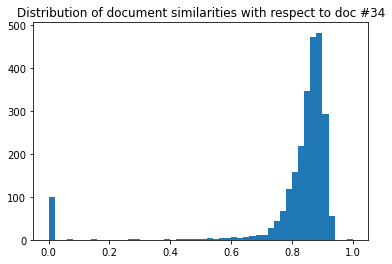

In [52]:
plt.hist(similarities, 50);
plt.title(f'Distribution of document similarities with respect to doc #{doc_id}');

### Find documents most similar to query

In [69]:
def doc2bow(vectorizer, document):
    '''
        convert document to bag of words
        note, that this code may crash if document contains words that are not in the vocabulary (vectorizer.get_feature_names_out()).  
    '''
    if isinstance(document, str):
        return vectorizer.transform([document])
    else: 
        return vectorizer.transform(document)

def find_most_similar(documemts_matrix, vectorizer, query, top_k = 10):
    '''
        return top_k documents most similar to the query
    '''
    from sklearn.metrics.pairwise import cosine_similarity
    
    query_vector = doc2bow(vectorizer, query) # convert query to vector
    similarities = cosine_similarity(documemts_matrix, query_vector) # compute similarity between the query and all documents
    sort_order = np.argsort(similarities.flatten())[::-1] # rank documents by similarity to the query
    return sort_order[:top_k], similarities[sort_order[:top_k]]

def compile_results(ted_talks, doc_ids, similarities):
    '''
        convert similarity results to a dataframe object
    '''
    import pandas as pd
    res = ted_talks.iloc[doc_ids][['headline','description','transcript']]
    res['similarity'] = similarities
    return res

In [70]:
doc_id = 34
doc_ids, similarities = find_most_similar(matrix, vectorizer, ted_talks['corpus'].iloc[doc_id], top_k=10 )
compile_results(ted_talks, doc_ids, similarities)

,headline,description,transcript,similarity
34,The birth of Wikipedia,"Jimmy Wales recalls how he assembled ""a ragtag...","0:11\n\n\nCharles Van Doren, who was later\na ...",1.000000
1407,What we learned from teetering on the fiscal c...,"At the end of 2012, the US political system wa...",0:12\n\n\nSo a friend of mine who's a politica...,0.935998
2396,Nationalism vs. globalism: the new political d...,How do we make sense of today's political divi...,0:11\n\n\nChris Anderson: Hello.\nWelcome to t...,0.933819
288,"The web is more than ""better TV""",In this absorbing look at emerging media and t...,"0:11\n\n\nWell, good morning.\nYou know, the c...",0.933088
374,"Mosquitos, malaria and education",Bill Gates hopes to solve some of the world's ...,0:14\n\n\nI wrote a letter last week talking a...,0.931873
220,The new open-source economics,Yochai Benkler explains how collaborative proj...,"0:11\n\n\nOne of the problems of writing, and ...",0.931251
1347,Are droids taking our jobs?,Robots and algorithms are getting good at jobs...,"0:11\n\n\nAs it turns out, when tens of millio...",0.931042
46,Behind the design of Seattle's library,Architect Joshua Prince-Ramus takes the audien...,0:13\n\n\nI'm going to present\nthree projects...,0.930515
617,Innovating to zero!,"At TED2010, Bill Gates unveils his vision for ...",0:11\n\n\nI'm going to talk today\nabout energ...,0.930085
1159,A census of the ocean,Oceanographer Paul Snelgrove shares the result...,0:11\n\n\nThe oceans cover some 70 percent of ...,0.929831


In [71]:
ted_talks['corpus'].iloc[doc_id]

'charles van doren who was later a senior editor of britannica said the ideal encyclopedia should be radical  it should stop being safe but if you know anything about the history of britannica since 1962 it was anything but radical still a very completely safe stodgy type of encyclopedia wikipedia on the other hand begins with a very radical idea and thats for all of us to imagine a world in which every single person on the planet is given free access to the sum of all human knowledge and thats what were doing so wikipedia  you just saw the little demonstration of it  its a freely licensed encyclopedia its written by thousands of volunteers all over the world in many many languages its written using wiki software  which is the type of software he just demonstrated  so anyone can quickly edit and save and it goes live on the internet immediately and everything about wikipedia is managed by virtually an allvolunteer staff so when yochai is talking about new methods of organization hes ex

In [72]:
doc_ids, similarities = find_most_similar(matrix, vectorizer, 'wikipedia', top_k=10 )
compile_results(ted_talks, doc_ids, similarities)

,headline,description,transcript,similarity
34,The birth of Wikipedia,"Jimmy Wales recalls how he assembled ""a ragtag...","0:11\n\n\nCharles Van Doren, who was later\na ...",0.088342
629,Is Pivot a turning point for web exploration?,"Gary Flake demos Pivot, a new way to browse an...",0:16\n\n\nIf I can leave you with one big idea...,0.046368
512,The Web as random acts of kindness,Feeling like the world is becoming less friend...,"0:11\n\n\nMy name is Jonathan Zittrain,\nand i...",0.040928
2330,How the blockchain will radically transform th...,Say hello to the decentralized economy -- the ...,0:12\n\n\nEconomists have been exploring\npeop...,0.028043
1292,A Navy Admiral's thoughts on global security,Imagine global security driven by collaboratio...,0:11\n\n\nI'm gonna talk a little bit about op...,0.023806
220,The new open-source economics,Yochai Benkler explains how collaborative proj...,"0:11\n\n\nOne of the problems of writing, and ...",0.019637
1692,How data will transform business,What does the future of business look like? In...,0:11\n\n\nI'm going to talk a little bit about...,0.016697
1358,Let's pool our medical data,"When you're getting medical treatment, or taki...","0:11\n\n\nSo I have bad news, I have good news...",0.012837
1382,A bath without water,If you had to walk a mile for a jug of water e...,"0:11\n\n\nSo I grew up in Limpopo, on the bord...",0.012729
1084,Massive-scale online collaboration,After re-purposing CAPTCHA so each human-typed...,0:11\n\n\nHow many of you had to fill out some...,0.012276


In [73]:
doc_ids, similarities = find_most_similar(matrix, vectorizer, 'big data artificial intelligence', top_k=10 )
compile_results(ted_talks, doc_ids, similarities)

,headline,description,transcript,similarity
398,The next web,"20 years ago, Tim Berners-Lee invented the Wor...",0:11\n\n\nTime flies.\nIt's actually almost 20...,0.161384
1831,Big data is better data,Self-driving cars were just the start. What's ...,0:11\n\n\nAmerica's favorite pie is?\n\n\n\n\n...,0.130192
634,The year open data went worldwide,"At TED2009, Tim Berners-Lee called for ""raw da...",0:11\n\n\nLast year here at TED\nI asked you t...,0.129438
2426,How we can find ourselves in data,"Giorgia Lupi uses data to tell human stories, ...",0:11\n\n\nThis is what my last week looked lik...,0.113623
2321,Your company's data could end world hunger,Your company might have donated money to help ...,0:11\n\n\nJune 2010.\nI landed for the first t...,0.112050
2117,How to use data to make a hit TV show,Does collecting more data lead to better decis...,0:11\n\n\nRoy Price is a man that most of you\...,0.105959
1927,How we found the worst place to park in New Yo...,City agencies have access to a wealth of data ...,"0:11\n\n\nSix thousand miles of road,\n600 mil...",0.096707
1676,A new equation for intelligence,Is there an equation for intelligence? Yes. It...,0:11\n\n\nIntelligence what is it?\nIf we tak...,0.096401
1564,Better baby care -- thanks to Formula 1,"During a Formula 1 race, a car sends hundreds ...",0:11\n\n\nMotor racing is a funny old business...,0.089856
1935,Play this game to come up with original ideas,Shimpei Takahashi always dreamed of designing ...,0:13\n\n\nHello.\nI'm a toy developer.\nWith a...,0.084405
